## K Means Clustering, Agglomerative Clustering, DBSCAN Clustering:
Objective :

1. Perform featurization BoW,TFIDF, Avg Word2Vec, tf-idf-Word2Vec.
2. At the end of the assignment, please elaborate on the step by step procedure you followed to solve the assignment.

## 3. DBSCAN Clustering:
1. Find the best ‘Eps’ using the elbow-knee method.
2. Try representing those reviews in a cluster as a word cloud so that it would be more comprehensible what a particular cluster represents.

### Step-By-Step procedure

1. In this, we need to work with all 4-vectorizers (BOW, TFIDF,Avg w2v and TF-IDF weighted w2v) where we will convert our texted review into numerical(vector) form in order to apply any Model on it.

2. After that we will take our cleandedtext(i.e cleand text means we have already cleaned our data by removing stops words, other this which are going to affect our model) and then we will take only test data not their respective class lable because as we know we are goint to apply K-means clustering algo which do not required class lables. what is does is it mainly group/clusters the similar data points

3. As we know DBSCAN is density based clustering algo and in this we have to hyperparameters i.e min_pts and EPS what are these min_pts i.e min_samples is The number of samples (or total weight) in a neighborhood for a point to be considered as a core point. and eps is the maximum distance between two samples for them to be considered as in the same neighborhood. and we typically try to choose larger min_points because which helps to remove the outliers 

4. We typically choose min_pts is 2*dim-of-our data and EPS using using elbow-knee methods.

5. After getting min_points and EPS we try to implement DBSCAN model with different EPS near by to best EPS and try to read and represent the reviews for each EPS 


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle
#taking cleaned data i.e in Reviews table  from final sql database
#making connection with database 
conn = sqlite3.connect('final.sqlite') 
final = pd.read_sql_query(""" SELECT * FROM Reviews""", conn) 

C:\Users\nisha\Anaconda3\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
final = final[:5000]
print(len(final))

5000


In [3]:
CleanedText = final['CleanedText'];
text=final.CleanedText.values    

In [ ]:
def dbscan_implement_diff_eps(n_eps,min_pts,data):
    print("Note: Cluster labels for each point in the dataset given to fit(). Noisy samples are given the label -1.\n")
    for eps_val in n_eps:
        model = DBSCAN(eps=eps_val, min_samples=min_pts).fit(data)
        print("#" * 25, "DBSCAN with EPS = ", eps_val, "  ", "#" * 25)
        print("\nReviews for the clusters -> 1: \n")
        print("Clusters",set(model.labels_))
        n_clusters = len(set(model.labels_))
        print("DBSCAN with EPS =%.2f and min_samples = %d the no of Clusters we get is = %d"%(eps_val,min_pts,n_clusters))
        print('\n')
        review_count = 1
        for i in range(model.labels_.shape[0]):
            if model.labels_[i] == 0:
                if review_count == 3:
                    break;
                else:
                    print('Review - ',review_count)
                    print(reviews[i])
                    cluster_wordcloud_generated_image_fun(reviews[i])
                    review_count = review_count+1
        
        print("_" * 100)
        print("\n")

In [21]:
from tqdm import tqdm
import os

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)
import seaborn as sns; 


# Reference http://iopscience.iop.org/article/10.1088/1755-1315/31/1/012012/pdf
# function to determinethe distance of nth-nearest neighbour to all points in a multi-dimensional array
reviews = final['Text'].values
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

def n_neighbour(vectors , n):
    distance = []
    for point in vectors:
        temp = np.sort(np.sum((vectors-point)**2,axis=1),axis=None)
        distance.append(temp[n])
    return np.sqrt(np.array(distance))

def dbscan_implement_diff_eps(n_eps,min_pts,data):
    print("\nNote: Cluster labels for each point in the dataset given to fit(). Noisy samples are given the label -1.\n")
    for eps_val in n_eps:
        model = DBSCAN(eps=eps_val, min_samples=min_pts).fit(data)
        print("#" * 30, "DBSCAN with EPS = ", eps_val, "  ", "#" * 30)
        clusters_list = list(set(model.labels_)) 
        n_clusters = len(set(model.labels_))
        print("DBSCAN with EPS =%.2f and min_pts = %d the no of Clusters we get is = %d"%(eps_val,min_pts,n_clusters))
#         print('\n')
         
        for cluster_name in clusters_list:
            review_count = 1
            print("*" * 100)
            if cluster_name == -1:
                print("Noisy samples are given the label -> ",cluster_name)
            else:
                print("Reviews of cluster -> ",cluster_name+1)
            print("*" * 100)
            for i in range(model.labels_.shape[0]):
                if model.labels_[i] == cluster_name:
                    if review_count == 3:
                        break;
                    else:
                        print('Review - ',review_count)
                        print(reviews[i])
                        cluster_wordcloud_generated_image_fun(reviews[i])
                        review_count = review_count+1
        
        print("_" * 100)
        print("\n")


def cluster_wordcloud_generated_image_fun(text):
    wordcloud = WordCloud(max_font_size=50, max_words=100,stopwords=stopwords ,background_color="white").generate(text)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()
    
    

## Bow
Applying Bow vectorizer on data

In [5]:
#BOW 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=200)
vocabulary= vectorizer.fit(text)
#print("the shape of out text BOW vectorizer ",vocabulary.get_shape())

bow_data= vectorizer.transform(text)
print("the shape of out text BOW vectorizer ",bow_data.get_shape())

the shape of out text BOW vectorizer  (5000, 173)


### Find the best ‘Eps’ using the elbow-knee method.

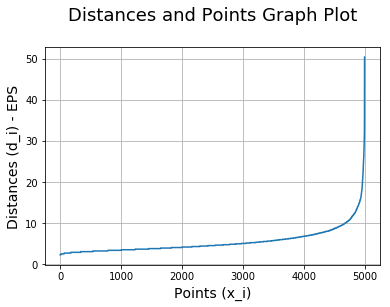

In [7]:
#bow_data.shape[1]
min_pts = 2*bow_data.shape[1]
# Computing distances of nth-nearest neighbours
dist = n_neighbour(bow_data.toarray(),min_pts)
sorted_distance = np.sort(dist)
# bow_data.shape[0]
n_points = [i for i in range(bow_data.shape[0])]

# Draw distances(d_i) VS points(x_i) plot
plt.plot(n_points, sorted_distance)
plt.xlabel('Points (x_i)',size=14)
plt.ylabel('Distances (d_i) - EPS',size=14)
plt.title('Distances and Points Graph Plot\n',size=18)
plt.grid()
plt.show()

### Implementing DBSCAN
So after getting best EPS lets try different nearby eps to see that the change in eps what will happen to our clusters 


Note: Cluster labels for each point in the dataset given to fit(). Noisy samples are given the label -1.

############################## DBSCAN with EPS =  8    ##############################
DBSCAN with EPS =8.00 and min_pts = 346 the no of Clusters we get is = 2
****************************************************************************************************
Reviews of cluster ->  1
****************************************************************************************************
Review -  1
this witty little book makes my son laugh at loud. i recite it in the car as we're driving along and he always can sing the refrain. he's learned about whales, India, drooping roses:  i love all the new words this book  introduces and the silliness of it all.  this is a classic book i am  willing to bet my son will STILL be able to recite from memory when he is  in college


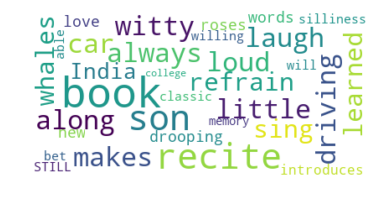

Review -  2
I grew up reading these Sendak books, and watching the Really Rosie movie that incorporates them, and love them. My son loves them too. I do however, miss the hard cover version. The paperbacks seem kind of flimsy and it takes two hands to keep the pages open.


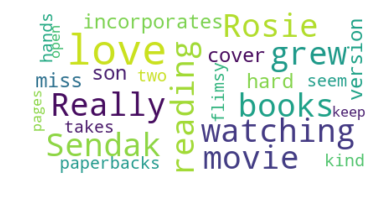

****************************************************************************************************
Noisy samples are given the label ->  -1
****************************************************************************************************
Review -  1
These days, when a person says, "chicken soup" they're probably going to follow up those words with, "for the soul" or maybe "for the teenaged soul".  Didn't used to be that way.  Why I can remember a time when if a person said, "chicken soup" those words were followed by an enthusiastic "with rice!".  Such was the power of Maurice Sendak's catchy 1962 children's book.  I am pleased to report that if you care to read this book again today, you will find it hasn't dimished a jot in terms of frolicksome fun.  In this book we are led through a whirlwind chicken soup year with our host, a boy who bears no little resemblance to Sendak's other great rhyming tale "Pierre" (in looks if not demeanor).  It's a catchy flouncy bouncy combo of soup

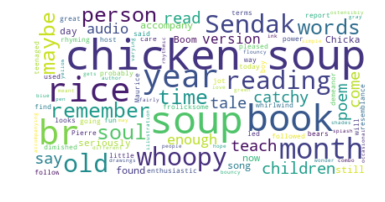

Review -  2
Freeze dried liver has a hypnotic effect on dogs. They LOVE it and will do just about anything for it, so it is a great treat to use for training. (Powdered freeze dried liver is even added to many dog medicines nowadays-- heartworm and arthritis tablets, etc.-- because it causes the dog to scarf the medicine down like a treat.)<br /><br />Freeze dried liver has a dry, hard, yet powdery/easy to chew consistency. It comes chopped/cubed. It is extremely lightweight due to the fact there is so little moisture in the product (thus the low weights on product labels).<br /><br />Even though your dog will love liver treats, you shouldn't overfeed it. The manufacturer recommends 1-2 cubes daily for small dogs, 2-3 cubes for medium dogs, and 3-4 cubes for large dogs.<br /><br />The largest package sizes of liver treats tend to be far more economical. I recommend buying the larger tubs, as you will save lots of money, you'll have a handy treat supply around for a longer time, and you

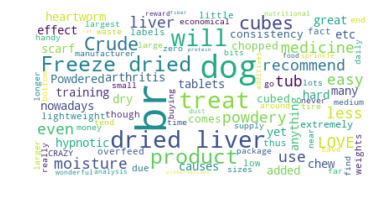

____________________________________________________________________________________________________


############################## DBSCAN with EPS =  10    ##############################
DBSCAN with EPS =10.00 and min_pts = 346 the no of Clusters we get is = 2
****************************************************************************************************
Reviews of cluster ->  1
****************************************************************************************************
Review -  1
this witty little book makes my son laugh at loud. i recite it in the car as we're driving along and he always can sing the refrain. he's learned about whales, India, drooping roses:  i love all the new words this book  introduces and the silliness of it all.  this is a classic book i am  willing to bet my son will STILL be able to recite from memory when he is  in college


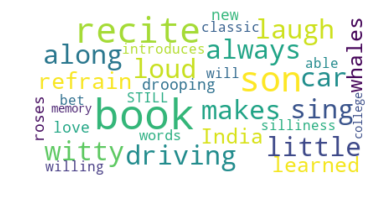

Review -  2
I grew up reading these Sendak books, and watching the Really Rosie movie that incorporates them, and love them. My son loves them too. I do however, miss the hard cover version. The paperbacks seem kind of flimsy and it takes two hands to keep the pages open.


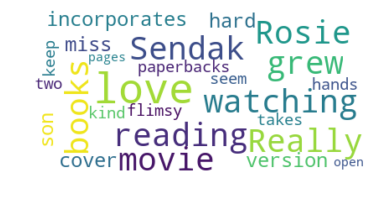

****************************************************************************************************
Noisy samples are given the label ->  -1
****************************************************************************************************
Review -  1
These days, when a person says, "chicken soup" they're probably going to follow up those words with, "for the soul" or maybe "for the teenaged soul".  Didn't used to be that way.  Why I can remember a time when if a person said, "chicken soup" those words were followed by an enthusiastic "with rice!".  Such was the power of Maurice Sendak's catchy 1962 children's book.  I am pleased to report that if you care to read this book again today, you will find it hasn't dimished a jot in terms of frolicksome fun.  In this book we are led through a whirlwind chicken soup year with our host, a boy who bears no little resemblance to Sendak's other great rhyming tale "Pierre" (in looks if not demeanor).  It's a catchy flouncy bouncy combo of soup

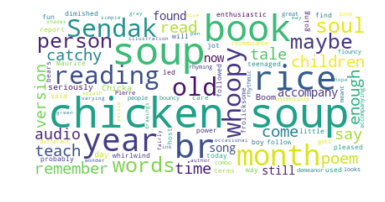

Review -  2
Freeze dried liver has a hypnotic effect on dogs. They LOVE it and will do just about anything for it, so it is a great treat to use for training. (Powdered freeze dried liver is even added to many dog medicines nowadays-- heartworm and arthritis tablets, etc.-- because it causes the dog to scarf the medicine down like a treat.)<br /><br />Freeze dried liver has a dry, hard, yet powdery/easy to chew consistency. It comes chopped/cubed. It is extremely lightweight due to the fact there is so little moisture in the product (thus the low weights on product labels).<br /><br />Even though your dog will love liver treats, you shouldn't overfeed it. The manufacturer recommends 1-2 cubes daily for small dogs, 2-3 cubes for medium dogs, and 3-4 cubes for large dogs.<br /><br />The largest package sizes of liver treats tend to be far more economical. I recommend buying the larger tubs, as you will save lots of money, you'll have a handy treat supply around for a longer time, and you

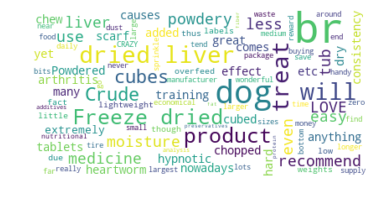

____________________________________________________________________________________________________


############################## DBSCAN with EPS =  12    ##############################
DBSCAN with EPS =12.00 and min_pts = 346 the no of Clusters we get is = 2
****************************************************************************************************
Reviews of cluster ->  1
****************************************************************************************************
Review -  1
this witty little book makes my son laugh at loud. i recite it in the car as we're driving along and he always can sing the refrain. he's learned about whales, India, drooping roses:  i love all the new words this book  introduces and the silliness of it all.  this is a classic book i am  willing to bet my son will STILL be able to recite from memory when he is  in college


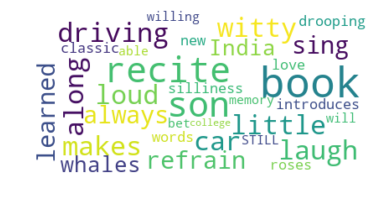

Review -  2
I grew up reading these Sendak books, and watching the Really Rosie movie that incorporates them, and love them. My son loves them too. I do however, miss the hard cover version. The paperbacks seem kind of flimsy and it takes two hands to keep the pages open.


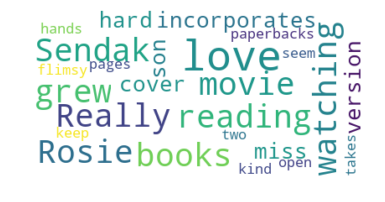

****************************************************************************************************
Noisy samples are given the label ->  -1
****************************************************************************************************
Review -  1
Tim Burton had come off the blockbuster success of his first feature film PEE-WEE'S BIG ADVENTURE (1985) when he was greenlighted by Warner Bros. to direct the project he REALLY wanted to make. It was the picture that would define the rest of his career to this day: the supernaturally weird black comedy (and weirdly-titled) BEETLEJUICE (1988). It was so unique, so strange to me that I didn't know what to make of it when I first saw it on video in 1989. I remember from that first time liking parts of it, but not liking the picture as a whole. The movie was so frenetic, so odd in its mixture of Goth Horror, Comedy, gruesome visual effects (I'm still kind of amazed that it got a PG rating instead of PG-13) and cartoonish slapstick that I 

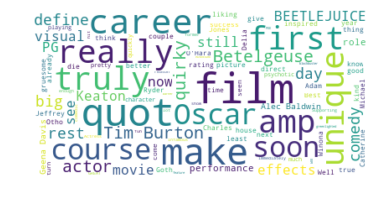

Review -  2
Picked up a set of 2 at the local home improvement store for ~$11.  The design of this trap seems to count on the animal pushing dirt in front of him and the dirt is what sets off the trap.  In these instances, the gopher will likely be caught behind the neck or shoulders.  I see a lot of holes on our property where the hole is not plugged and plenty of sign that he has been out scampering around.  In these cases, he'll get caught in the hip area with his nose up against where the trigger plate would be set.  This just makes it a little more awkward in emptying the trap.  The cinch type trap looks to be just as effective but much easier to empty.  The cinch trap will cost up to 2-3 times more, though.  I might get one or two cinch traps, but 9/10 will be the 610 type.<br /><br />I have read at least one review where the sweep of the jaws could be an issue, preventing the trap from being seated in small holes and from closing effectively.  This is really easy to work around.

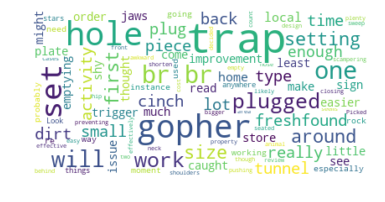

____________________________________________________________________________________________________


############################## DBSCAN with EPS =  14    ##############################
DBSCAN with EPS =14.00 and min_pts = 346 the no of Clusters we get is = 2
****************************************************************************************************
Reviews of cluster ->  1
****************************************************************************************************
Review -  1
this witty little book makes my son laugh at loud. i recite it in the car as we're driving along and he always can sing the refrain. he's learned about whales, India, drooping roses:  i love all the new words this book  introduces and the silliness of it all.  this is a classic book i am  willing to bet my son will STILL be able to recite from memory when he is  in college


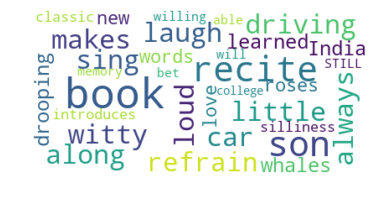

Review -  2
I grew up reading these Sendak books, and watching the Really Rosie movie that incorporates them, and love them. My son loves them too. I do however, miss the hard cover version. The paperbacks seem kind of flimsy and it takes two hands to keep the pages open.


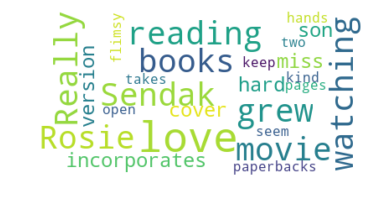

****************************************************************************************************
Noisy samples are given the label ->  -1
****************************************************************************************************
Review -  1
Tim Burton had come off the blockbuster success of his first feature film PEE-WEE'S BIG ADVENTURE (1985) when he was greenlighted by Warner Bros. to direct the project he REALLY wanted to make. It was the picture that would define the rest of his career to this day: the supernaturally weird black comedy (and weirdly-titled) BEETLEJUICE (1988). It was so unique, so strange to me that I didn't know what to make of it when I first saw it on video in 1989. I remember from that first time liking parts of it, but not liking the picture as a whole. The movie was so frenetic, so odd in its mixture of Goth Horror, Comedy, gruesome visual effects (I'm still kind of amazed that it got a PG rating instead of PG-13) and cartoonish slapstick that I 

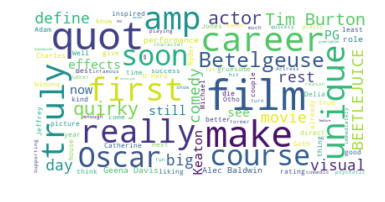

Review -  2
Picked up a set of 2 at the local home improvement store for ~$11.  The design of this trap seems to count on the animal pushing dirt in front of him and the dirt is what sets off the trap.  In these instances, the gopher will likely be caught behind the neck or shoulders.  I see a lot of holes on our property where the hole is not plugged and plenty of sign that he has been out scampering around.  In these cases, he'll get caught in the hip area with his nose up against where the trigger plate would be set.  This just makes it a little more awkward in emptying the trap.  The cinch type trap looks to be just as effective but much easier to empty.  The cinch trap will cost up to 2-3 times more, though.  I might get one or two cinch traps, but 9/10 will be the 610 type.<br /><br />I have read at least one review where the sweep of the jaws could be an issue, preventing the trap from being seated in small holes and from closing effectively.  This is really easy to work around.

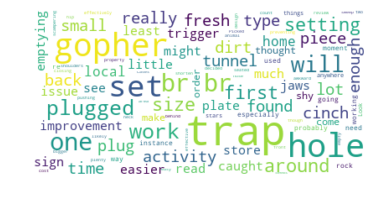

____________________________________________________________________________________________________


############################## DBSCAN with EPS =  17    ##############################
DBSCAN with EPS =17.00 and min_pts = 346 the no of Clusters we get is = 2
****************************************************************************************************
Reviews of cluster ->  1
****************************************************************************************************
Review -  1
this witty little book makes my son laugh at loud. i recite it in the car as we're driving along and he always can sing the refrain. he's learned about whales, India, drooping roses:  i love all the new words this book  introduces and the silliness of it all.  this is a classic book i am  willing to bet my son will STILL be able to recite from memory when he is  in college


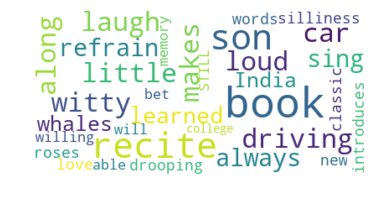

Review -  2
I grew up reading these Sendak books, and watching the Really Rosie movie that incorporates them, and love them. My son loves them too. I do however, miss the hard cover version. The paperbacks seem kind of flimsy and it takes two hands to keep the pages open.


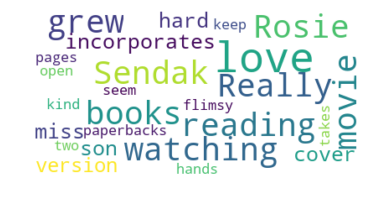

****************************************************************************************************
Noisy samples are given the label ->  -1
****************************************************************************************************
Review -  1
Tim Burton had come off the blockbuster success of his first feature film PEE-WEE'S BIG ADVENTURE (1985) when he was greenlighted by Warner Bros. to direct the project he REALLY wanted to make. It was the picture that would define the rest of his career to this day: the supernaturally weird black comedy (and weirdly-titled) BEETLEJUICE (1988). It was so unique, so strange to me that I didn't know what to make of it when I first saw it on video in 1989. I remember from that first time liking parts of it, but not liking the picture as a whole. The movie was so frenetic, so odd in its mixture of Goth Horror, Comedy, gruesome visual effects (I'm still kind of amazed that it got a PG rating instead of PG-13) and cartoonish slapstick that I 

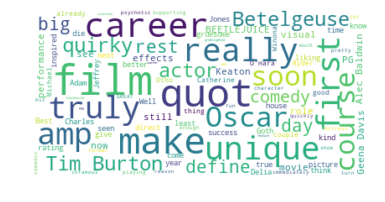

Review -  2
Picked up a set of 2 at the local home improvement store for ~$11.  The design of this trap seems to count on the animal pushing dirt in front of him and the dirt is what sets off the trap.  In these instances, the gopher will likely be caught behind the neck or shoulders.  I see a lot of holes on our property where the hole is not plugged and plenty of sign that he has been out scampering around.  In these cases, he'll get caught in the hip area with his nose up against where the trigger plate would be set.  This just makes it a little more awkward in emptying the trap.  The cinch type trap looks to be just as effective but much easier to empty.  The cinch trap will cost up to 2-3 times more, though.  I might get one or two cinch traps, but 9/10 will be the 610 type.<br /><br />I have read at least one review where the sweep of the jaws could be an issue, preventing the trap from being seated in small holes and from closing effectively.  This is really easy to work around.

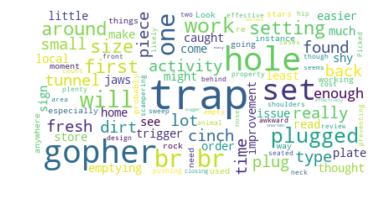

____________________________________________________________________________________________________




In [22]:
#So after getting best EPS lets try different nearby eps to see that the change in eps what will happen to our clusters 
#Cluster labels for each point in the dataset given to fit(). Noisy samples are given the label -1.
eps_list = [8,10,12,14,17]
dbscan_implement_diff_eps(eps_list,min_pts,bow_data.toarray())

## TF-IDF

In [29]:
#tfidf 
# tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
tf_idf_vect = TfidfVectorizer(min_df=150)
vocabulary = tf_idf_vect.fit(text)
#print("the shape of out text TF-IDF vectorizer ",tf_idf_x_tr.get_shape())
tf_idf_data = tf_idf_vect.transform(text)
print("the shape of out text TF-IDF vectorizer ",tf_idf_data.get_shape())

the shape of out text TF-IDF vectorizer  (5000, 240)


### Find the best ‘Eps’ using the elbow-knee method.

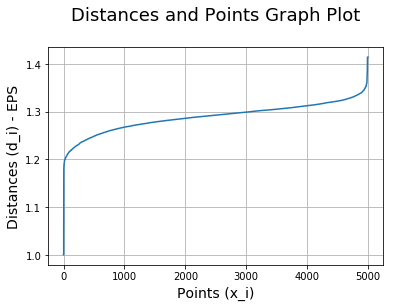

In [30]:
#tf_idf_data.shape[1]
min_pts = 2*tf_idf_data.shape[1]
# Computing distances of nth-nearest neighbours
dist = n_neighbour(tf_idf_data.toarray(),min_pts)
sorted_distance = np.sort(dist)
# tf_idf_data.shape[0]
n_points = [i for i in range(tf_idf_data.shape[0])]

# Draw distances(d_i) VS points(x_i) plot
plt.plot(n_points, sorted_distance)
plt.xlabel('Points (x_i)',size=14)
plt.ylabel('Distances (d_i) - EPS',size=14)
plt.title('Distances and Points Graph Plot\n',size=18)
plt.grid()
plt.show()

### Implementing DBSCAN
So after getting best EPS lets try different nearby eps to see that the change in eps what will happen to our clusters


Note: Cluster labels for each point in the dataset given to fit(). Noisy samples are given the label -1.

############################## DBSCAN with EPS =  0.5    ##############################
DBSCAN with EPS =0.50 and min_pts = 480 the no of Clusters we get is = 1
****************************************************************************************************
Noisy samples are given the label ->  -1
****************************************************************************************************
Review -  1
this witty little book makes my son laugh at loud. i recite it in the car as we're driving along and he always can sing the refrain. he's learned about whales, India, drooping roses:  i love all the new words this book  introduces and the silliness of it all.  this is a classic book i am  willing to bet my son will STILL be able to recite from memory when he is  in college


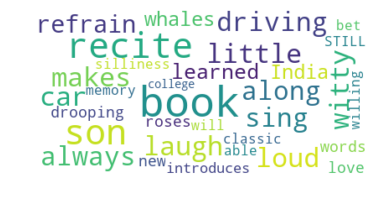

Review -  2
I grew up reading these Sendak books, and watching the Really Rosie movie that incorporates them, and love them. My son loves them too. I do however, miss the hard cover version. The paperbacks seem kind of flimsy and it takes two hands to keep the pages open.


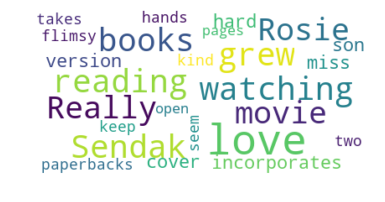

____________________________________________________________________________________________________


############################## DBSCAN with EPS =  0.8    ##############################
DBSCAN with EPS =0.80 and min_pts = 480 the no of Clusters we get is = 1
****************************************************************************************************
Noisy samples are given the label ->  -1
****************************************************************************************************
Review -  1
this witty little book makes my son laugh at loud. i recite it in the car as we're driving along and he always can sing the refrain. he's learned about whales, India, drooping roses:  i love all the new words this book  introduces and the silliness of it all.  this is a classic book i am  willing to bet my son will STILL be able to recite from memory when he is  in college


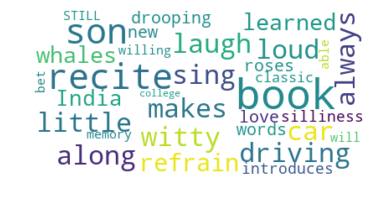

Review -  2
I grew up reading these Sendak books, and watching the Really Rosie movie that incorporates them, and love them. My son loves them too. I do however, miss the hard cover version. The paperbacks seem kind of flimsy and it takes two hands to keep the pages open.


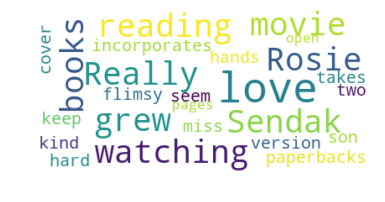

____________________________________________________________________________________________________


############################## DBSCAN with EPS =  1.2    ##############################
DBSCAN with EPS =1.20 and min_pts = 480 the no of Clusters we get is = 1
****************************************************************************************************
Reviews of cluster ->  1
****************************************************************************************************
Review -  1
this witty little book makes my son laugh at loud. i recite it in the car as we're driving along and he always can sing the refrain. he's learned about whales, India, drooping roses:  i love all the new words this book  introduces and the silliness of it all.  this is a classic book i am  willing to bet my son will STILL be able to recite from memory when he is  in college


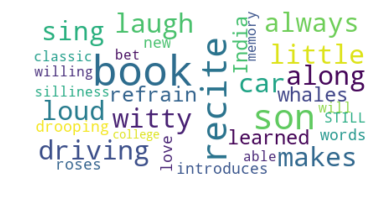

Review -  2
I grew up reading these Sendak books, and watching the Really Rosie movie that incorporates them, and love them. My son loves them too. I do however, miss the hard cover version. The paperbacks seem kind of flimsy and it takes two hands to keep the pages open.


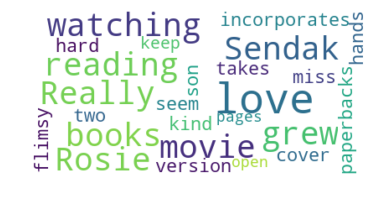

____________________________________________________________________________________________________


############################## DBSCAN with EPS =  2    ##############################
DBSCAN with EPS =2.00 and min_pts = 480 the no of Clusters we get is = 1
****************************************************************************************************
Reviews of cluster ->  1
****************************************************************************************************
Review -  1
this witty little book makes my son laugh at loud. i recite it in the car as we're driving along and he always can sing the refrain. he's learned about whales, India, drooping roses:  i love all the new words this book  introduces and the silliness of it all.  this is a classic book i am  willing to bet my son will STILL be able to recite from memory when he is  in college


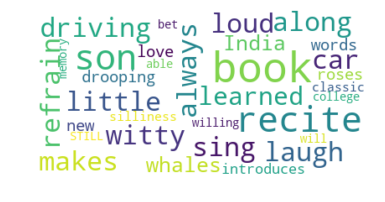

Review -  2
I grew up reading these Sendak books, and watching the Really Rosie movie that incorporates them, and love them. My son loves them too. I do however, miss the hard cover version. The paperbacks seem kind of flimsy and it takes two hands to keep the pages open.


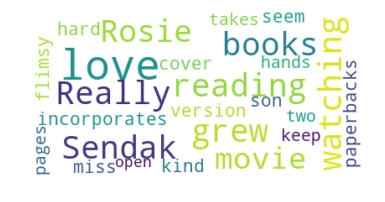

____________________________________________________________________________________________________


############################## DBSCAN with EPS =  3    ##############################
DBSCAN with EPS =3.00 and min_pts = 480 the no of Clusters we get is = 1
****************************************************************************************************
Reviews of cluster ->  1
****************************************************************************************************
Review -  1
this witty little book makes my son laugh at loud. i recite it in the car as we're driving along and he always can sing the refrain. he's learned about whales, India, drooping roses:  i love all the new words this book  introduces and the silliness of it all.  this is a classic book i am  willing to bet my son will STILL be able to recite from memory when he is  in college


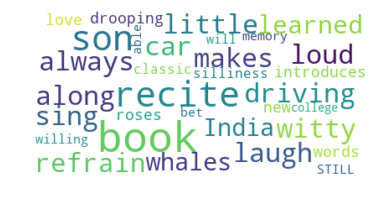

Review -  2
I grew up reading these Sendak books, and watching the Really Rosie movie that incorporates them, and love them. My son loves them too. I do however, miss the hard cover version. The paperbacks seem kind of flimsy and it takes two hands to keep the pages open.


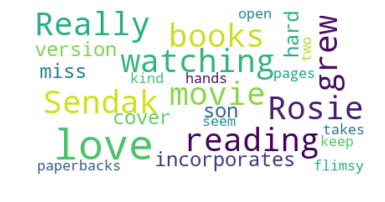

____________________________________________________________________________________________________




In [31]:
#So after getting best EPS lets try different nearby eps to see that the change in eps what will happen to our clusters 
#Cluster labels for each point in the dataset given to fit(). Noisy samples are given the label -1.
min_pts = 2*tf_idf_data.shape[1]
eps_list = [0.5,0.8,1.2,2,3]
dbscan_implement_diff_eps(eps_list,min_pts,tf_idf_data.toarray())

******TF-IDF ENDS *****

## Word2Vec

In [32]:
#Word2Vec mode 
#spliting train sentence in words 
# Train your own Word2Vec model using your own text corpus
i=0
list_of_sent=[]
for sent in text:
    list_of_sent.append(sent.split())
    
print(len(text))
# print("\n--------------Spliting each sentence into words--------word list of ie data corpus---------\n")
# print(list_of_sent[:2])
#word list of ie data corpus

5000


In [33]:
#The Word to Vec model produces a vocabulary, with each word being represented by 
#an n-dimensional numpy array 
data_w2v_model=Word2Vec(list_of_sent,min_count=1,size=50, workers=4)
data_w2v_model.wv['man']
wlist =list(data_w2v_model.wv.vocab)
# wlist is a list of words 
len(wlist)

10429

In [34]:
# CALCULATE AVG WORD2VEC FOR data
w2v_words = list(data_w2v_model.wv.vocab)
# compute average word2vec for each review.
data_sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_sent): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = data_w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    data_sent_vectors.append(sent_vec)
print(len(data_sent_vectors))
print(len(data_sent_vectors[0]))

100%|█████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:10<00:00, 463.93it/s]


5000
50


### Find the best ‘Eps’ using the elbow-knee method

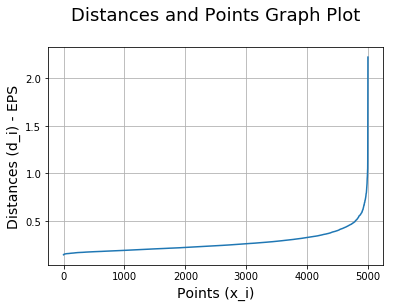

In [37]:
min_pts = 2*data_sent_vectors[0].shape[0]
# Computing distances of nth-nearest neighbours
dist = n_neighbour(data_sent_vectors,min_pts)
sorted_distance = np.sort(dist)

n_points = [i for i in range(len(data_sent_vectors))]

plt.plot(n_points, sorted_distance)
plt.xlabel('Points (x_i)',size=14)
plt.ylabel('Distances (d_i) - EPS',size=14)
plt.title('Distances and Points Graph Plot\n',size=18)
plt.grid()
plt.show()

### Implementing DBSCAN
So after getting best EPS lets try different nearby eps to see that the change in eps what will happen to our clusters


Note: Cluster labels for each point in the dataset given to fit(). Noisy samples are given the label -1.

############################## DBSCAN with EPS =  0.5    ##############################
DBSCAN with EPS =0.50 and min_pts = 100 the no of Clusters we get is = 2
****************************************************************************************************
Reviews of cluster ->  1
****************************************************************************************************
Review -  1
this witty little book makes my son laugh at loud. i recite it in the car as we're driving along and he always can sing the refrain. he's learned about whales, India, drooping roses:  i love all the new words this book  introduces and the silliness of it all.  this is a classic book i am  willing to bet my son will STILL be able to recite from memory when he is  in college


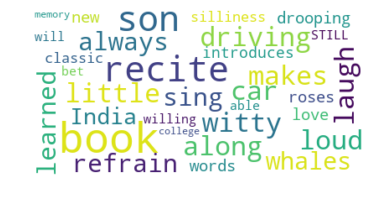

Review -  2
I grew up reading these Sendak books, and watching the Really Rosie movie that incorporates them, and love them. My son loves them too. I do however, miss the hard cover version. The paperbacks seem kind of flimsy and it takes two hands to keep the pages open.


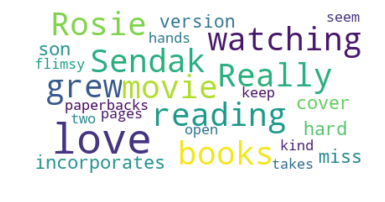

****************************************************************************************************
Noisy samples are given the label ->  -1
****************************************************************************************************
Review -  1
This is 2.5 oz larger than what you can find in pet stores and less expensive. Shipped day the it was ordered and arrived 2 days later with prime.


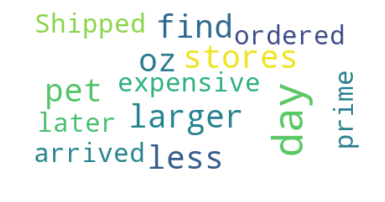

Review -  2
Yes, they are a bit expensive but, they are high quality, and pure nutrition.  Good training treat and not too high in calories.  Highly recommend this!


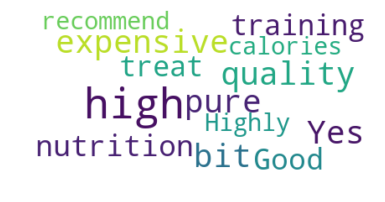

____________________________________________________________________________________________________


############################## DBSCAN with EPS =  0.8    ##############################
DBSCAN with EPS =0.80 and min_pts = 100 the no of Clusters we get is = 2
****************************************************************************************************
Reviews of cluster ->  1
****************************************************************************************************
Review -  1
this witty little book makes my son laugh at loud. i recite it in the car as we're driving along and he always can sing the refrain. he's learned about whales, India, drooping roses:  i love all the new words this book  introduces and the silliness of it all.  this is a classic book i am  willing to bet my son will STILL be able to recite from memory when he is  in college


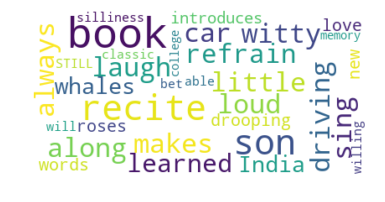

Review -  2
I grew up reading these Sendak books, and watching the Really Rosie movie that incorporates them, and love them. My son loves them too. I do however, miss the hard cover version. The paperbacks seem kind of flimsy and it takes two hands to keep the pages open.


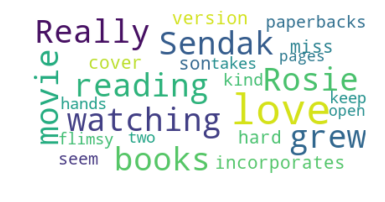

****************************************************************************************************
Noisy samples are given the label ->  -1
****************************************************************************************************
Review -  1
Same price as Dr. Foster & Smith.


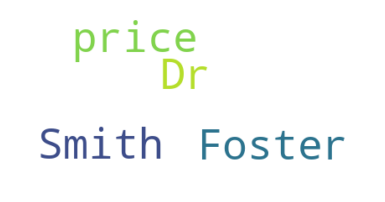

Review -  2
El producto me lleg&oacute; en una semana hasta Costa Rica, lleg&oacute; en buen estado y es de buena calidad, le quito una estrella ya que me lleg&oacute; un dinosaurio diferente al que ponen en la foto pero aun asi estoy satisfecho con la compra.


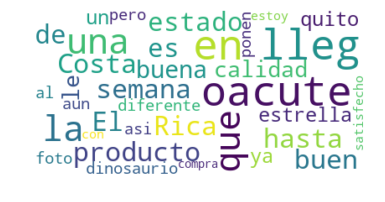

____________________________________________________________________________________________________


############################## DBSCAN with EPS =  1.2    ##############################
DBSCAN with EPS =1.20 and min_pts = 100 the no of Clusters we get is = 2
****************************************************************************************************
Reviews of cluster ->  1
****************************************************************************************************
Review -  1
this witty little book makes my son laugh at loud. i recite it in the car as we're driving along and he always can sing the refrain. he's learned about whales, India, drooping roses:  i love all the new words this book  introduces and the silliness of it all.  this is a classic book i am  willing to bet my son will STILL be able to recite from memory when he is  in college


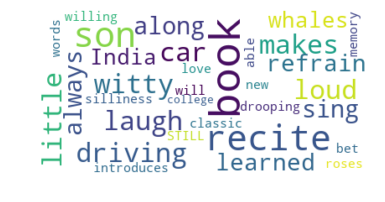

Review -  2
I grew up reading these Sendak books, and watching the Really Rosie movie that incorporates them, and love them. My son loves them too. I do however, miss the hard cover version. The paperbacks seem kind of flimsy and it takes two hands to keep the pages open.


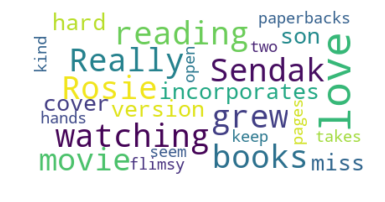

****************************************************************************************************
Noisy samples are given the label ->  -1
****************************************************************************************************
Review -  1
Lo recomiendo ampliamente, le da un sabor a la carne muy bueno, se conserva por m&aacute;s tiempo.


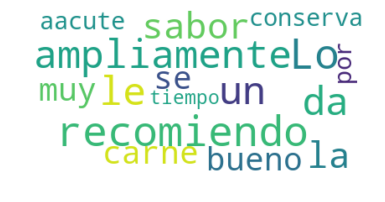

____________________________________________________________________________________________________


############################## DBSCAN with EPS =  2    ##############################
DBSCAN with EPS =2.00 and min_pts = 100 the no of Clusters we get is = 1
****************************************************************************************************
Reviews of cluster ->  1
****************************************************************************************************
Review -  1
this witty little book makes my son laugh at loud. i recite it in the car as we're driving along and he always can sing the refrain. he's learned about whales, India, drooping roses:  i love all the new words this book  introduces and the silliness of it all.  this is a classic book i am  willing to bet my son will STILL be able to recite from memory when he is  in college


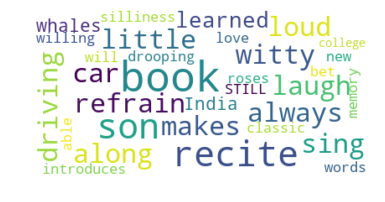

Review -  2
I grew up reading these Sendak books, and watching the Really Rosie movie that incorporates them, and love them. My son loves them too. I do however, miss the hard cover version. The paperbacks seem kind of flimsy and it takes two hands to keep the pages open.


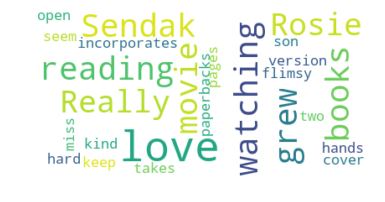

____________________________________________________________________________________________________


############################## DBSCAN with EPS =  3    ##############################
DBSCAN with EPS =3.00 and min_pts = 100 the no of Clusters we get is = 1
****************************************************************************************************
Reviews of cluster ->  1
****************************************************************************************************
Review -  1
this witty little book makes my son laugh at loud. i recite it in the car as we're driving along and he always can sing the refrain. he's learned about whales, India, drooping roses:  i love all the new words this book  introduces and the silliness of it all.  this is a classic book i am  willing to bet my son will STILL be able to recite from memory when he is  in college


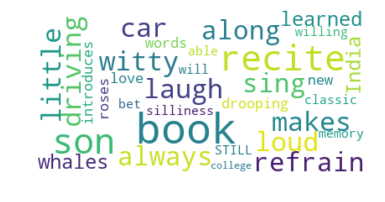

Review -  2
I grew up reading these Sendak books, and watching the Really Rosie movie that incorporates them, and love them. My son loves them too. I do however, miss the hard cover version. The paperbacks seem kind of flimsy and it takes two hands to keep the pages open.


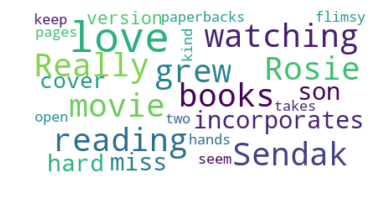

____________________________________________________________________________________________________




In [38]:
#So after getting best EPS lets try different nearby eps to see that the change in eps what will happen to our clusters 
#Cluster labels for each point in the dataset given to fit(). Noisy samples are given the label -1.
min_pts = 2*data_sent_vectors[0].shape[0]
eps_list = [0.5,0.8,1.2,2,3]
dbscan_implement_diff_eps(eps_list,min_pts,data_sent_vectors)

******AVG-W2V ENDS *******

## TF-IDF weighted Word2Vec

In [39]:
#tfidf 
tf_idf_vect = TfidfVectorizer()
vocabulary = tf_idf_vect.fit(text)
#print("the shape of out text TF-IDF vectorizer ",tf_idf_x_tr.get_shape())
tf_idf_data = tf_idf_vect.transform(text)
print("the shape of out text TF-IDF vectorizer ",tf_idf_data.get_shape())

# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tf_idf_vect.get_feature_names(), list(tf_idf_vect.idf_)))

the shape of out text TF-IDF vectorizer  (5000, 10429)


In [40]:
# TF-IDF weighted Word2Vec
tfidf_feat = tf_idf_vect.get_feature_names() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

data_tfidf_sent_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in tqdm(list_of_sent): # for each review/sentence 
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = data_w2v_model.wv[word]
#             tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
            # to reduce the computation we are 
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf valeus of word in this review
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    data_tfidf_sent_vectors.append(sent_vec)
    row += 1

print(len(data_tfidf_sent_vectors))
print(len(data_tfidf_sent_vectors[0]))

100%|█████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:16<00:00, 312.18it/s]


5000
50


### Find the best ‘Eps’ using the elbow-knee method 

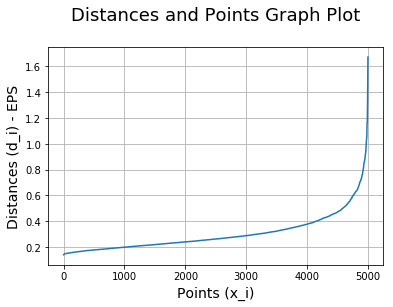

In [42]:
min_pts = 2*data_tfidf_sent_vectors[0].shape[0]
# Computing distances of nth-nearest neighbours
dist = n_neighbour(data_tfidf_sent_vectors,min_pts)
sorted_distance = np.sort(dist)

n_points = [i for i in range(len(data_tfidf_sent_vectors))]

plt.plot(n_points, sorted_distance)
plt.xlabel('Points (x_i)',size=14)
plt.ylabel('Distances (d_i) - EPS',size=14)
plt.title('Distances and Points Graph Plot\n',size=18)
plt.grid()
plt.show()

### Implementing DBSCAN
So after getting best EPS lets try different nearby eps to see that the change in eps what will happen to our clusters


Note: Cluster labels for each point in the dataset given to fit(). Noisy samples are given the label -1.

############################## DBSCAN with EPS =  0.5    ##############################
DBSCAN with EPS =0.50 and min_pts = 100 the no of Clusters we get is = 2
****************************************************************************************************
Reviews of cluster ->  1
****************************************************************************************************
Review -  1
this witty little book makes my son laugh at loud. i recite it in the car as we're driving along and he always can sing the refrain. he's learned about whales, India, drooping roses:  i love all the new words this book  introduces and the silliness of it all.  this is a classic book i am  willing to bet my son will STILL be able to recite from memory when he is  in college


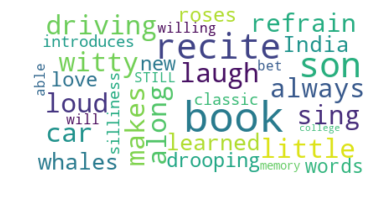

Review -  2
I grew up reading these Sendak books, and watching the Really Rosie movie that incorporates them, and love them. My son loves them too. I do however, miss the hard cover version. The paperbacks seem kind of flimsy and it takes two hands to keep the pages open.


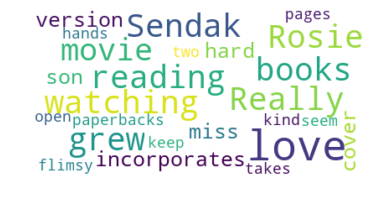

****************************************************************************************************
Noisy samples are given the label ->  -1
****************************************************************************************************
Review -  1
Yes, they are a bit expensive but, they are high quality, and pure nutrition.  Good training treat and not too high in calories.  Highly recommend this!


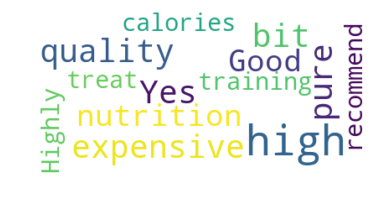

Review -  2
Delishus, pleeze give mee more Gimborn Livur Treets.  Everee dog should havve these.  I don't know abowt kats, they probabbly don't deserve them.  Kats skare me.... Anyway these treets are delishus and yoo should buy manee buckets for yore dog.  If yore dog doesn't want his bucket of livur treets, I will take them. Thank yoo, love, Sonar.


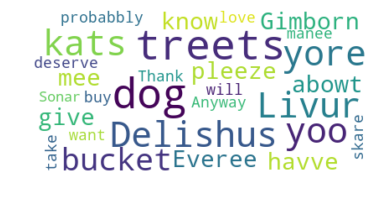

____________________________________________________________________________________________________


############################## DBSCAN with EPS =  0.8    ##############################
DBSCAN with EPS =0.80 and min_pts = 100 the no of Clusters we get is = 2
****************************************************************************************************
Reviews of cluster ->  1
****************************************************************************************************
Review -  1
this witty little book makes my son laugh at loud. i recite it in the car as we're driving along and he always can sing the refrain. he's learned about whales, India, drooping roses:  i love all the new words this book  introduces and the silliness of it all.  this is a classic book i am  willing to bet my son will STILL be able to recite from memory when he is  in college


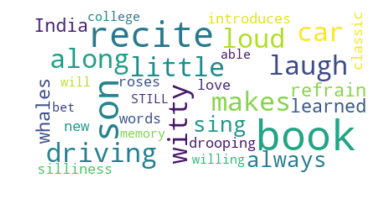

Review -  2
I grew up reading these Sendak books, and watching the Really Rosie movie that incorporates them, and love them. My son loves them too. I do however, miss the hard cover version. The paperbacks seem kind of flimsy and it takes two hands to keep the pages open.


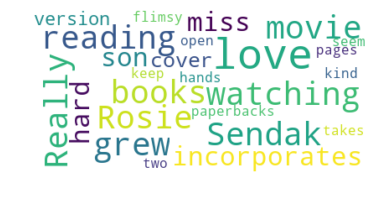

****************************************************************************************************
Noisy samples are given the label ->  -1
****************************************************************************************************
Review -  1
Yes, they are a bit expensive but, they are high quality, and pure nutrition.  Good training treat and not too high in calories.  Highly recommend this!


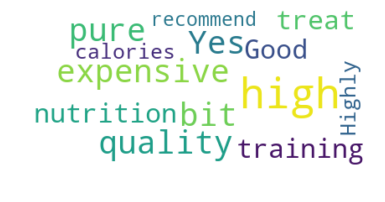

Review -  2
El producto me lleg&oacute; en una semana hasta Costa Rica, lleg&oacute; en buen estado y es de buena calidad, le quito una estrella ya que me lleg&oacute; un dinosaurio diferente al que ponen en la foto pero aun asi estoy satisfecho con la compra.


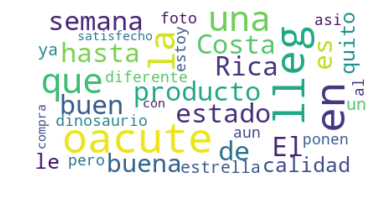

____________________________________________________________________________________________________


############################## DBSCAN with EPS =  1.2    ##############################
DBSCAN with EPS =1.20 and min_pts = 100 the no of Clusters we get is = 1
****************************************************************************************************
Reviews of cluster ->  1
****************************************************************************************************
Review -  1
this witty little book makes my son laugh at loud. i recite it in the car as we're driving along and he always can sing the refrain. he's learned about whales, India, drooping roses:  i love all the new words this book  introduces and the silliness of it all.  this is a classic book i am  willing to bet my son will STILL be able to recite from memory when he is  in college


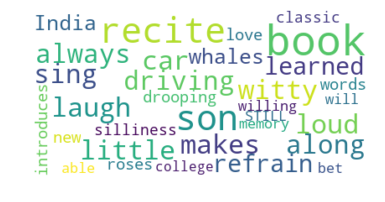

Review -  2
I grew up reading these Sendak books, and watching the Really Rosie movie that incorporates them, and love them. My son loves them too. I do however, miss the hard cover version. The paperbacks seem kind of flimsy and it takes two hands to keep the pages open.


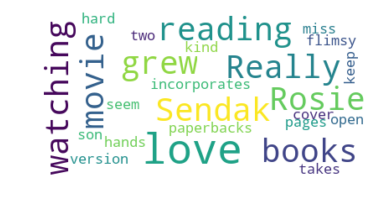

____________________________________________________________________________________________________


############################## DBSCAN with EPS =  2    ##############################
DBSCAN with EPS =2.00 and min_pts = 100 the no of Clusters we get is = 1
****************************************************************************************************
Reviews of cluster ->  1
****************************************************************************************************
Review -  1
this witty little book makes my son laugh at loud. i recite it in the car as we're driving along and he always can sing the refrain. he's learned about whales, India, drooping roses:  i love all the new words this book  introduces and the silliness of it all.  this is a classic book i am  willing to bet my son will STILL be able to recite from memory when he is  in college


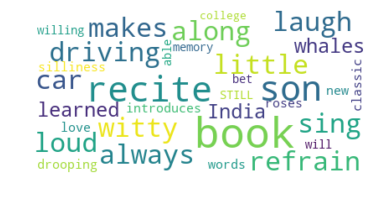

Review -  2
I grew up reading these Sendak books, and watching the Really Rosie movie that incorporates them, and love them. My son loves them too. I do however, miss the hard cover version. The paperbacks seem kind of flimsy and it takes two hands to keep the pages open.


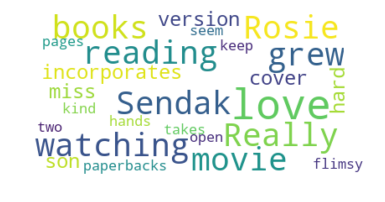

____________________________________________________________________________________________________


############################## DBSCAN with EPS =  3    ##############################
DBSCAN with EPS =3.00 and min_pts = 100 the no of Clusters we get is = 1
****************************************************************************************************
Reviews of cluster ->  1
****************************************************************************************************
Review -  1
this witty little book makes my son laugh at loud. i recite it in the car as we're driving along and he always can sing the refrain. he's learned about whales, India, drooping roses:  i love all the new words this book  introduces and the silliness of it all.  this is a classic book i am  willing to bet my son will STILL be able to recite from memory when he is  in college


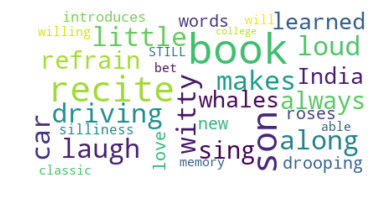

Review -  2
I grew up reading these Sendak books, and watching the Really Rosie movie that incorporates them, and love them. My son loves them too. I do however, miss the hard cover version. The paperbacks seem kind of flimsy and it takes two hands to keep the pages open.


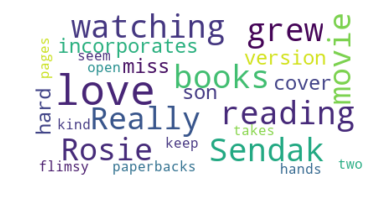

____________________________________________________________________________________________________




In [43]:
#So after getting best EPS lets try different nearby eps to see that the change in eps what will happen to our clusters 
#Cluster labels for each point in the dataset given to fit(). Noisy samples are given the label -1.
min_pts = 2*data_tfidf_sent_vectors[0].shape[0]
eps_list = [0.5,0.8,1.2,2,3]
dbscan_implement_diff_eps(eps_list,min_pts,data_tfidf_sent_vectors)